In [10]:
#import numpy module
import numpy as np

In [11]:
#import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [18]:
#load dataset and split images into training and validation sets
image_size = (180, 180)

Malaria = r'C:\Users\asua\Documents\SKILL DEVP'#file path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\asua\Documents\SKILL DEVP\Malaria",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)#training set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\asua\Documents\SKILL DEVP\Malaria",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
)#validation set
train_ds = train_ds.astype('float32')/255
val_ds = val_ds.astype('float32')/255

Found 19534 files belonging to 2 classes.
Using 15628 files for training.
Found 19534 files belonging to 2 classes.
Using 3906 files for validation.


AttributeError: 'BatchDataset' object has no attribute 'astype'

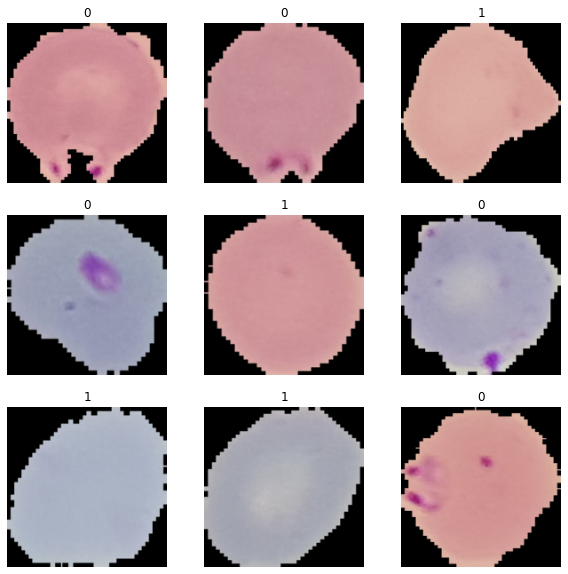

In [13]:
#visualizng images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
       

In [15]:
#defining model
from keras import layers
from keras import models


model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu',input_shape = (180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

ValueError: Attempt to convert a value (<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>) to a Tensor.

In [ ]:
model.summary()

In [ ]:
#compiling our model with learning rate = 1e-4
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.Adam(learning_rate=1e-4),
metrics=['acc'])

In [ ]:
#fitting our training and validation datasets into the model with epochs=8
history = model.fit(train_ds, epochs=8, validation_data=val_ds, batch_size = 128)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\asua\Documents\Malaria test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)#test set

In [ ]:
model.predict(test_ds)